In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/DL/Lab 8/dogs-vs-cats/train.zip"

In [3]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/DL/Lab 8/dogs-vs-cats/test1.zip"

In [4]:
import os
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


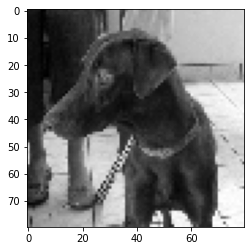

In [5]:
main_dir = "/content/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [6]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [7]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [8]:
X = X/255.0

In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 291s 464ms/step - loss: 0.6394 - accuracy: 0.6321 - val_loss: 0.5860 - val_accuracy: 0.6846
Epoch 2/10
625/625 [==============================] - 298s 477ms/step - loss: 0.5350 - accuracy: 0.7304 - val_loss: 0.5211 - val_accuracy: 0.7458
Epoch 3/10
625/625 [==============================] - 295s 471ms/step - loss: 0.4670 - accuracy: 0.7753 - val_loss: 0.4762 - val_accuracy: 0.7768
Epoch 4/10
625/625 [==============================] - 297s 475ms/step - loss: 0.4136 - accuracy: 0.8099 - val_loss: 0.4740 - val_accuracy: 0.7860
Epoch 5/10
625/625 [==============================] - 293s 468ms/step - loss: 0.3429 - accuracy: 0.8474 - val_loss: 0.4741 - val_accuracy: 0.7794
Epoch 6/10
625/625 [==============================] - 292s 467ms/step - loss: 0.2592 - accuracy: 0.8927 - val_loss: 0.5504 - val_accuracy: 0.7784
Epoch 7/10
625/625 [==============================] - 293s 469ms/step - loss: 0.1792 - accuracy: 0.9291 - val_loss: 0.6119 -

In [11]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)


X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [12]:
predictions = model.predict(X_test)


391/391 [==============================] - 44s 112ms/step
